# 3. Pre-processing and Training

## 3.1 Introduction

The data files for each antibiotic (azithromycin, ciprofloxacin, and ceftrixone) that contains:
<ul>
    <li>whether the strain is resistant to the antibiotic (0 for sensitive, 1 for resistant)</li>
    <li>many columns of unitigs and whether or not they are present (1 for present)</li>
</ul>

## 3.2 Importing Packages

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 3.3 Loading Data

In [2]:
# Loading azithromycin data
azm_data = pd.read_csv('../data/interim/azm_data_step2.csv', index_col=0)
azm_data.head()

,resistant,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,...,ACCGATGAGTTCGCCGGAATCGGTACGATTGAC,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG
0,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# Loading cip data
cip_data = pd.read_csv('../data/interim/cip_data_step2.csv', index_col=0)
cip_data.head()

,resistant,"CGAAAGCAGGCTTTCGGCATAGACGGACGACAGCCGTTCGTCAACCCAAT,CTGTTTTTCGGCAATCATCACCACATCGATGCTCGAACAGCCCGCCAC,CGGACACAACGGGCGCGGAAGATAAAGCTGAAATTGTCGGAA","CCTTTCAAACCGTGCATCAGCCCGAGGCTGTGGCGGAC,ACATACAAAACGCCGCCCTCCGCCTTCTGCAACA,CATCCGCGTGAACCATCCTTTGACCTTGCACGGC",GATATATTGGGAAACGAACGGAATCAGAATCTGCC,"CGTCTGAAGTGATTTCGCGCCCCAGCCAGTC,GTAATCGATGAAGAAGGCTTCGCGTTTGCGGGTG",AACCGGTGAGAAACTCGAGCGCACCATCCGCGTGAACCATCCTTTGACCTTG,ACGGGGGAGGGAGCAGATTGCGGCAGATTTGG,CAGCAAACCGTTCCGCTTCAACGCGCGTACTTGGGAAT,CGGCGCAGGGTTGAGCTACGCGGGTAAAGCCGCAGG,ATATTGTAGTGTTCGCCATAACAGACCTGAAAATCATC,...,CGCCTATGTGCTGCAACTTTTGGACACCGCGCTCGC,GGAATCAGGACGATAAACAAAATGCTGCCGGCGAG,CGCTACATAAGGAGAACCCTAAAATGCCGCA,ACATCCTGCCATCCGACAAGCGGCGGCAACCGCCAAAAAC,TCTTGGGCGCCGTTTGTGGGTTTGTTTATCGCGCG,AAGCAGCGCACGCTGTGAATCACATCTTTCGCC,ACCGCGCCGGACAGGGTGCGCGTAAACGGCAGTTG,AACGACAATACACACACCCTTCCCCCGCGCC,AAATTCATCAAAGAGCAAAGCGATTGGAAACCTCTGCCTGCTAATGCCGGTGAGTTGACCC,"GCCGCCTTGTCCTGATTTTTGTTAATCCGCCA,AACCATAAGTCGGCAACTTCGTAAACCAGGTGGGACGGGTCTTTGTCTTTGGATGC,AGAAGCTCGGAATCGTTCAGCAATACGCCTGCG"
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [4]:
# Loading cfx data
cfx_data = pd.read_csv('../data/interim/cfx_data_step2.csv', index_col=0)
cfx_data.head()

,resistant,TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG,CCGCACGGGGGAAATCCTCGCCTTGGCCAATACGCCCGCCTACGATCCCAACAG,GATATAACTGCGTCCGTCGGCATATTCGCCC,ACCCCGCAACACCTCCTGCTCAACCGCAACGACCTCTTGGTCGGCGG,GGGAAAGGGTAACGTTTGCCGGCGGGGCGGTTGAGGTTGGCGGTT,CAAACTCGAACAGAAAGGCAAGTCGTTTATCTGG,AACCGAGCCGGGCGGCACCGGTACGGCGGGT,GCTTGTCGATGTGCCGGTTGATGTTTTGAGAAACAAACTCGAACAGAAA,GACAAATTCTTGGCGGACGATGACGGCAACAGTACCGAGCGCGGCACCCAATGCCAGCGCG,...,CATGTCTTTCGGTTATGGCCTGCAATTAAGC,GGCACGGTTGCGCCGCTGTTCGCTGTCTGCCCGGCCGGG,AAAACCGCCATCAGTTTTCCGCTCATCGGAGGA,TTGTTTTTCAAAGCTGACCGGCAACAATTCGCCGTCATGGGTCAAGACAGTATAGGCACG,TTGCCCGTAGTGACGATTTCTACGTTCAGGTTTGCTTCGATCGGAAATTGG,GTCGATGTTTTGAGGAACAAACTCGAACAGAAA,ACCGCCATCAGTTTTCCGCTCATCGGAGGAAGGG,"TCCCAACAGACCCGGCCGGGCAGACAGCGAACAG,GACGGTTTCTTTATTTGATTTGAACGGAAAAACCAT,CGTCAAAGACGCCAACGACGCCGGCACCAAAATCGACAC,CCATCAAAACCGCCATCAGTTTTCCGCTCATCGGA,CCAAGCCACGTCGGCATTCGGTTTCGAGCCGATGTCCA,TTCAGGCTGCCGCCCATAATTTTTTTGAAGGGC",GGAACGCCTGTCCGAGCTTGTCGATGTGCCGGT,CAGCGCATCGGTCATTGTCGGACTCGAGCCGCTGCTGATG
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


## 3.4 Creating Test Splits

All three datasets consist solely of binary values and thus do not require normalization, standardization, or dummy variables, so they are ready for creating test splits. I will be stratifying them as azm and cfx both have substantially more sensitive than resistant strains.

In [5]:
azm_y = azm_data['resistant']
azm_X = azm_data.drop(columns='resistant')

azm_X_train, azm_X_test, azm_y_train, azm_y_test = train_test_split(azm_X, azm_y, test_size=0.25, stratify=azm_y)

In [6]:
cip_y = cip_data['resistant']
cip_X = cip_data.drop(columns='resistant')

cip_X_train, cip_X_test, cip_y_train, cip_y_test = train_test_split(cip_X, cip_y, test_size=0.25, stratify=cip_y)

In [7]:
cfx_y = cfx_data['resistant']
cfx_X = cfx_data.drop(columns='resistant')

cfx_X_train, cfx_X_test, cfx_y_train, cfx_y_test = train_test_split(cfx_X, cfx_y, test_size=0.25, stratify=cfx_y)

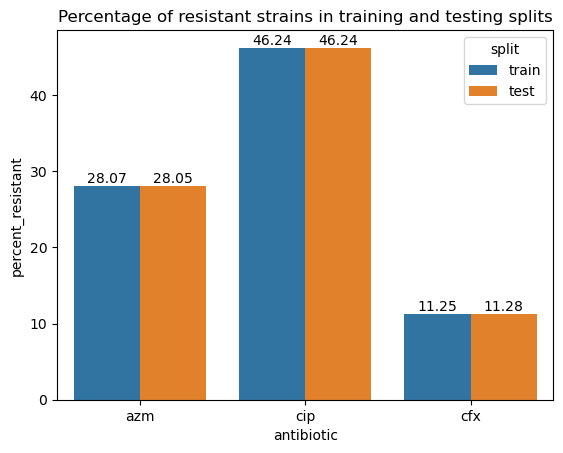

In [8]:
pct_resistant = pd.DataFrame({
    "antibiotic": ['azm', 'azm', 'cip', 'cip', 'cfx', 'cfx'],
    "split": ['train', 'test', 'train', 'test', 'train', 'test'],
    "percent_resistant": [round(azm_y_train.value_counts(normalize=True)[1]*100, 2),
                         round(azm_y_test.value_counts(normalize=True)[1]*100, 2),
                         round(cip_y_train.value_counts(normalize=True)[1]*100, 2),
                         round(cip_y_test.value_counts(normalize=True)[1]*100, 2),
                         round(cfx_y_train.value_counts(normalize=True)[1]*100, 2),
                         round(cfx_y_test.value_counts(normalize=True)[1]*100, 2)]
})

g = sns.barplot(data=pct_resistant, x='antibiotic', y='percent_resistant', hue='split')
for container in g.containers:
    g.bar_label(container)
plt.title("Percentage of resistant strains in training and testing splits");

## 3.5 Saving Split Data

In [9]:
azm_X_train.to_csv('../data/processed/azm_X_train.csv')
azm_X_test.to_csv('../data/processed/azm_X_test.csv')
azm_y_train.to_csv('../data/processed/azm_y_train.csv')
azm_y_test.to_csv('../data/processed/azm_y_test.csv')

In [10]:
cip_X_train.to_csv('../data/processed/cip_X_train.csv')
cip_X_test.to_csv('../data/processed/cip_X_test.csv')
cip_y_train.to_csv('../data/processed/cip_y_train.csv')
cip_y_test.to_csv('../data/processed/cip_y_test.csv')

In [11]:
cfx_X_train.to_csv('../data/processed/cfx_X_train.csv')
cfx_X_test.to_csv('../data/processed/cfx_X_test.csv')
cfx_y_train.to_csv('../data/processed/cfx_y_train.csv')
cfx_y_test.to_csv('../data/processed/cfx_y_test.csv')